# 1. 크롤링

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import time
import pandas as pd

In [ ]:
service = Service('chromedriver.exe')
driver = webdriver.Chrome(service = service)

In [ ]:
# CID : 카테고리(소설 : 1, 에세이 :55889 , 자기계발 : 336)
results = []

for page in range(1,21): # 페이지 입력
    url = "https://www.aladin.co.kr/shop/wbrowse.aspx?BrowseTarget=List&ViewRowsCount=50&ViewType=Detail\
    &PublishMonth=0&SortOrder=2&page={}&Stockstatus=0&PublishDay=84&CustReviewRankStart=0&CustReviewCountStart=0&PriceFilterMax=-1\
    &CID=1&SearchOption=".format(page)
    driver.get(url)
    time.sleep(2)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 페이지에 있는 도서 링크(50개)
    book_links = soup.select('ul > li > a.bo3')
    links = []
    for book_link in book_links:
        a= book_link['href']
        links.append(a)
    for link in links:
        driver.get(link)
        time.sleep(2)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        try:
            ISBN = soup.select('div.conts_info_list1 > ul > li')
            ISBN = ISBN[-1].text[-13:]
        except:
            pass

        #data = [ISBN]
        results.append(ISBN)

# 2. API 조회하기

In [ ]:
import requests
import pandas as pd
import json

In [ ]:
# API 호출키
KEY = '**************'

In [ ]:
url_look_list = []

for isbn in results:
    url_look = 'https://www.aladin.co.kr/ttb/api/ItemLookUp.aspx?ttbkey={}&itemIdType=isbn13&ItemId={}&output=JS&Version=20131101&OptResult=authors,reviewList,fulldescription,fulldescription2,Story,categoryIdList'.format(KEY, isbn)
    url_look_list.append(url_look)
print(url_look_list)

In [ ]:
items = []
lists = []
for url_look in url_look_list:
    try:
        response = requests.get(url_look)
        text = json.loads(response.text)
        #time.sleep(1)
        title = text['item'][0]['title']
        author = text['item'][0]['author']
        pubDate = text['item'][0]['pubDate']
        description = text['item'][0]['description']
        isbn13 = text['item'][0]['isbn13']
        categoryID = text['item'][0]['categoryId']
        categoryName = text['item'][0]['categoryName']
        salesPoint = text['item'][0]['salesPoint']
        adult = text['item'][0]['adult']
        rank = text['item'][0]['customerReviewRank']
        fullDes = text['item'][0]['fullDescription']
        fullDes2 = text['item'][0]['fullDescription2']
        story = text['item'][0]['subInfo']['story']
        try:
            reviewrank = text['item'][0]['reviewList'][0]['reviewRank']
            reviewtitle = text['item'][0]['reviewList'][0]['title']
            review_w = text['item'][0]['reviewList'][0]['writer']
        except:
            reviewrank = 0
            reviewtitle = 0
            review_w = 0
        lists.append([title, author, pubDate, description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w])
    except:
        pass
cols = ['title', 'author', 'pubDate','description','isbn13','categoryID','categoryName','salesPoint','adult','rank','fullDes','fullDes2','story','reviewrank','reviewtitle','review_w']
df = pd.DataFrame(lists, columns = cols)

In [ ]:
import pickle
df.to_pickle('essay.plk')

# 3. 크롤링 및 API 데이터 통합

In [ ]:
data1 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/data.pkl')
essay = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay.pkl')
essay_39 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_39-56.pkl')
essay_57 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_57-80.pkl')
essay_81 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_81-100.pkl')
essay_101 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_101-120.pkl')
essay_121 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_121-140.pkl')
essay_141 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_141-160.pkl')
essay_161 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_161-180.pkl')
essay_181 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_181-200.pkl')
essay_201 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_201-225.pkl')
essay_226 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_226-250.pkl')
essay_251 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/essay_251-300.pkl')
novel_1 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_1-20.pkl')
novel_21 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_21-40.pkl')
novel_41 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_41-60.pkl')
novel_61 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_61-80.pkl')
novel_81 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_81-100.pkl')
novel_101 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_101-120.pkl')
novel_121 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_121-140.pkl')
novel_141 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_141-160.pkl')
novel_161 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_161-180.pkl')
novel_181 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_181-200.pkl')
novel_201 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_201-220.pkl')
novel_221 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_221-240.pkl')
novel_241 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_241-260.pkl')
novel_261 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_261-280.pkl')
novel_281 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_281-300.pkl')
novel_301 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_301-320.pkl')
novel_321 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_321-340.pkl')
novel_341 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_341-360.pkl')
novel_361 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_361-380.pkl')
novel_381 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_381-400.pkl')
novel_401 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_401-420.pkl')
novel_421 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_421-440.pkl')
novel_441 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_441-460.pkl')
novel_461 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_461-480.pkl')
novel_481 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_481-500.pkl')
novel_501 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_501-526.pkl')
novel_527 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_527-600.pkl')
novel_601 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_601-650_.pkl')
novel_651 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_651-700.pkl')
novel_701 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_701-800.pkl')
novel_801 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_801-850.pkl')
novel_851 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_851-900.pkl')
novel_901 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_901-950.pkl')
novel_951 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_951-1000.pkl')
novel_1001 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/novel_1001-1017.pkl')
selfhelp_1 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/selfhelp_1-20.pkl')
selfhelp_21 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/selfhelp_21-40.pkl')
selfhelp_41 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/selfhelp_41-70.pkl')
selfhelp_71 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/selfhelp_71-100.pkl')

In [ ]:
data = pd.concat([data1, essay,essay_39,essay_57,essay_81,essay_101,essay_121,essay_141,essay_161,essay_181,essay_201,essay_226,essay_251,
                  novel_1, novel_21,novel_41,novel_61,novel_81,novel_101,novel_121,novel_141,novel_161,novel_181,
                  novel_201,novel_221,novel_241,novel_261,novel_281,novel_301,
                  novel_321,novel_341,novel_361,novel_381,novel_401,novel_421,novel_441,novel_461,novel_481,
                  novel_501,novel_527,novel_601,novel_651,novel_701,novel_801,novel_851,novel_901,novel_951,novel_1001,
                  selfhelp_1,selfhelp_21,selfhelp_41,selfhelp_71], ignore_index=True)
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70206 entries, 0 to 71638
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         70206 non-null  object
 1   author        70206 non-null  object
 2   pubDate       70206 non-null  object
 3   description   70206 non-null  object
 4   isbn13        70206 non-null  object
 5   categoryID    70206 non-null  int64 
 6   categoryName  70206 non-null  object
 7   salesPoint    70206 non-null  int64 
 8   adult         70206 non-null  bool  
 9   rank          70206 non-null  int64 
 10  fullDes       70206 non-null  object
 11  fullDes2      70206 non-null  object
 12  story         70206 non-null  object
 13  reviewrank    70206 non-null  int64 
 14  reviewtitle   70206 non-null  object
 15  review_w      70206 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 8.6+ MB


In [ ]:
data.to_pickle('/content/drive/MyDrive/도서추천시스템/data/크롤링 및 API 불러오기/book.pkl', protocol=4)

# 4. 자연어

# 4-1. 전처리

In [ ]:
## Mecab 설치

!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 59.0 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 26.53 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-03-22 07:36:42--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pickle

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/book.pkl')
data.head(3)

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
0,자기만의 방,"버지니아 울프 (지은이), 최설희 (옮긴이)",2022-03-10,,9791190710343,51373,국내도서>에세이>외국에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,0,0
1,오만과 편견,"제인 오스틴 (지은이), 이신 (옮긴이)",2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,국내도서>소설/시/희곡>영미소설,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,0,0
2,프랑켄슈타인,"메리 셸리 (지은이), 김나연 (옮긴이)",2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,국내도서>소설/시/희곡>영미소설,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70206 entries, 0 to 71638
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         70206 non-null  object
 1   author        70206 non-null  object
 2   pubDate       70206 non-null  object
 3   description   70206 non-null  object
 4   isbn13        70206 non-null  object
 5   categoryID    70206 non-null  int64 
 6   categoryName  70206 non-null  object
 7   salesPoint    70206 non-null  int64 
 8   adult         70206 non-null  bool  
 9   rank          70206 non-null  int64 
 10  fullDes       70206 non-null  object
 11  fullDes2      70206 non-null  object
 12  story         70206 non-null  object
 13  reviewrank    70206 non-null  int64 
 14  reviewtitle   70206 non-null  object
 15  review_w      70206 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 8.6+ MB


In [ ]:
#from eunjeon import Mecab

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
df = data.copy()

## 1. content 수정
- author, categoryName 컬럼 정제
- text 컬럼 추가
 

In [ ]:
# 작가 이름
authors = []
for author in df['author']:
    a = author.split('(')[0]
    authors.append(a)

In [ ]:
df['author'] = authors

In [ ]:
# categoryName
catagories = []
for category in df['categoryName']:
    try:
        b = category.split('>')[1]
    except:
        b = category.split('>')[0]
    catagories.append(b)

In [ ]:
df['categoryName'] = catagories

In [ ]:
# 카테고리 추출(cat)
cat = ['소설/시/희곡', '에세이', '자기계발']

df = df[df['categoryName'].isin(cat)]
df

In [ ]:
for i in range(len(df)):
    try:
        if (df['fullDes'][i] == '') & (df['fullDes2'][i] == ''):
            df = df.drop(index = i)
    except:
        pass

In [ ]:
df['reviewtitle'].replace(0,'', inplace=True)
df['text'] = df['description'] + df['fullDes'] + df['fullDes2'] + df['reviewtitle']

In [ ]:
df['text'] 

0        시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...
1        앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...
2        인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...
17       신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...
19       사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...
                               ...                        
71633    대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...
71634    20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...
71636    그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...
71637             [100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...
71638    '칭찬'과 '비난', '낙관'과 '비관'을 주제로, 우리가 관계 맺고 있는 수많은 ...
Name: text, Length: 54976, dtype: object

In [ ]:
#df.to_pickle('book1.pkl', protocol=4)

In [ ]:
df1 = df.copy()
df1.columns

Index(['title', 'author', 'pubDate', 'description', 'isbn13', 'categoryID',
       'categoryName', 'salesPoint', 'adult', 'rank', 'fullDes', 'fullDes2',
       'story', 'reviewrank', 'reviewtitle', 'review_w', 'text'],
      dtype='object')

In [ ]:
df1 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/book1.pkl')

In [ ]:
df1

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w,text
0,자기만의 방,버지니아 울프,2022-03-10,,9791190710343,51373,에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...
1,오만과 편견,제인 오스틴,2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,소설/시/희곡,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ..."
2,프랑켄슈타인,메리 셸리,2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,소설/시/희곡,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,,0,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...
17,[큰글씨책] 원서발췌 신선전,갈홍,2022-03-28,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...,9791128858338,50923,소설/시/희곡,0,False,0,동진의 갈홍이 지은 <신선전>. 신선의 행적과 장생불사를 다룬 신선설화집이자 신선전...,,,0,,0,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...
19,집착,아니 에르노,2022-03-18,사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,9788954685603,50921,소설/시/희곡,0,False,0,‘직접 체험하지 않은 허구를 쓴 적은 한 번도 없고 앞으로도 그럴 것’이라는 선언으...,,,0,,0,사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71633,뇌력혁명 - 뇌피로가 풀려야 인생이 풀린다!,이시형,2013-11-01,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,9791185020136,70239,자기계발,281,False,9,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,<b>활력 잃고 방황하는 한국인에게 건네는 이시형 박사의 인생 처방전!</b><BR...,,2,[마이리뷰]기대도 안했지만,mcatcher,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...
71634,남자의 교과서 - 여자는 전혀 모르고 남자는 차마 말 못하는 것들,명로진,2013-04-05,"20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...",9788997838127,3812,자기계발,281,False,9,남자들은 언제나 갑의 눈치를 보며 끊임없는 술자리에 위장을 버리면서도 ‘일’이 가장...,<b>남자들은 지금 최선을 다하고 있다!<BR>\n상사와 갑을 위해 웃음을 다 써버...,,8,[마이리뷰]남자의 교과서,남희돌이,"20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력..."
71636,그리스 신전에서 인간의 길을 묻다 - 내 인생을 바꾸는 4천 년의 지혜,스티븐 버트먼,2011-12-19,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,9788956591858,70216,자기계발,281,False,8,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,"매장된 도시와 버려진 사원의 잔해, 부서져가는 필사본에 담긴 채 4천 년의 세월을 ...",,8,[100자평]자신의 미숙함을 고민하는 청소년 혹은 20대 청년에게 ...,bright,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...
71637,성공을 부르는 긍정의 힘,사토 도미오,2006-05-25,,9788987794938,70216,자기계발,281,False,7,,,,4,"[100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...",Friday,"[100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## 2. 불용어 제거

In [ ]:
df1['text'] = df1['text'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


## 3. 토큰화
- 형태소 기반 토큰화 -> mecab

In [ ]:
results = []

for i in df1['text']:
    fullDes = mecab.pos(i)
    words_all = []
    for j in fullDes:
        
        if (j[1] == 'NNG') | (j[1] == 'NNP'):
            words_all.append(j[0])
    results.append(words_all)

In [ ]:
# Series 타입으로 변환 후 저장
# results_S = pd.Series(results)
# results_S.to_pickle('/content/drive/MyDrive/도서추천시스템_2/results.pkl', protocol=4)

# 타입을 list로 변환해 사용
# results = list(pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/results.pkl'))

# 4-2. 모델링

## 1. Word2Vec

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [ ]:
book_word2vec = Word2Vec(results, min_count=1)

In [ ]:
# 유사한 단어 30개 확인
book_word2vec.wv.most_similar("자연",topn=30)

[('섭리', 0.7051262855529785),
 ('친화', 0.6857259273529053),
 ('자연물', 0.6785339713096619),
 ('봄의', 0.639588475227356),
 ('사물', 0.621469259262085),
 ('인위', 0.6214691400527954),
 ('원초', 0.6051076054573059),
 ('순리', 0.6041595935821533),
 ('생명', 0.5990109443664551),
 ('생태', 0.5962780117988586),
 ('만물', 0.5951275825500488),
 ('동식물', 0.5913330912590027),
 ('합일', 0.5839176177978516),
 ('본연', 0.5830525755882263),
 ('순환', 0.5764613747596741),
 ('원시', 0.5746780633926392),
 ('생명력', 0.5723211765289307),
 ('조화', 0.5634194016456604),
 ('교감', 0.5612318515777588),
 ('본원', 0.5564683675765991),
 ('경외감', 0.5564281344413757),
 ('관조', 0.5533266067504883),
 ('변화무쌍', 0.5530858039855957),
 ('미물', 0.5445034503936768),
 ('음풍영월', 0.5433144569396973),
 ('경외', 0.540185809135437),
 ('자연인', 0.5400205850601196),
 ('심미', 0.5390784740447998),
 ('조응', 0.5369462966918945),
 ('유한', 0.5364730358123779)]

#4-3. 키워드 분리
- 장르(genres) : dic_1
- 감성(mood) : dic_2
- 관심사(interest) : idc_3

In [ ]:
key_list = ['시대', '역사', '철학', '로맨스', '전쟁',  '미스터리', '예술',  '판타지', '자서전', '동화', '과학', '무협', '고민', 
            '열정','시','희곡','가족','관계','동물','사진','그림','여행','미술','영화','음악','음식', '인생', '일상', 
            '친구', '성공', '청춘', '정치', '취미', '스포츠','일기', '자연', '종교', '사랑', '인간', '생각', '사회', 
            '도전', '긍정', '후회', '행복', '우울', '위로', '고통', '자유', '희망', '슬픔', '열망', '비극', '불안', '용기',
            '절망', '불행', '유머', '힐링', '리더십', '시간', '페미니즘', '취업', '진로', '비즈니스', '설득', '건강', '심리'            
]
#dic_1 : 장르, dic_2 : 감성, dic_3 : 관심사

In [ ]:
dic_S = pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/dic_S.pkl')
dic_1 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/dic_1.pkl')
dic_2 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/dic_2.pkl')
dic_3 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/dic_3.pkl')

In [ ]:
dic = {}

for key in key_list:
    words = book_word2vec.wv.most_similar(key,topn=30)
    
    lists = []
    lists.append(key)
    for i in range(len(words)):
        lists.append(words[i][0])
    lists
    
    dic[key] = lists
    
dic

In [ ]:
# Series 형태로 저장
# dic_S = pd.Series(dic)
# dic_S.to_pickle('/content/drive/MyDrive/도서추천시스템_2/dic_S.pkl', protocol=4)

# 읽을 때 다시 dict 형태로 변환해서 사용
# dic_S = dict(pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/dic_S.pkl'))

In [ ]:
book_vocab = book_word2vec.wv.vocab
book_similarity = book_word2vec[book_vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
book_vocab

In [ ]:
book_similarity

## 1. 도서 별 키워드 확인

In [ ]:
# 텍스트 컬럼에 내용이 없는 경우('') 확인하기
#for i in df1['text']:
#     if i == '':
#            print(i)

In [ ]:
# 1번째 text : df['fullDes']
# 명사만 추출

cv_list = []
tdm_list = []
words_list = []
count_mat_list = []
count_list = []
#def get_noun(words_all):
#    return n for n in words_all
        

for i in range(len(results)):
    cv = TfidfVectorizer(max_features=30) # feature 개수 임의 설정
    #cv_list.append([cv])
    try: # text가 없는 경우가 있어서
        tdm = cv.fit_transform(results[i])
        #tdm_list.append([tdm])
        words = cv.get_feature_names()
        words_list.append([words])
        count_mat = tdm.sum(axis=0) #  단어별로 count 매김
        #count_mat_list.append([count_mat])
        count = np.squeeze(np.asarray(count_mat)) # squeeze : 차원을 하나 줄임 (2차원 >> 1차원)
        count_list.append([count])
    except:
        tdm = ''
        #tdm_list.append([tdm])
        words = ''
        words_list.append([words])
        count_mat = ''
        #count_mat_list.append([count_mat])
        count = ''
        count_list.append([count])

In [ ]:
import operator

In [ ]:
word_count_list = []
for word, count in zip(words_list, count_list):
    word_count = list(zip(word, count))[0]
    #word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)
    word_count_list.append(word_count)

In [ ]:
word_count_list

[(['가난',
   '고전',
   '권리',
   '당부',
   '대학',
   '독자',
   '마음',
   '문학가',
   '버지니아',
   '비평',
   '사람',
   '사회',
   '서재',
   '셰익스피어',
   '시대',
   '여성',
   '영감',
   '울프',
   '의식',
   '이야기',
   '인습',
   '자신',
   '자유',
   '작가',
   '작품',
   '전달',
   '창조',
   '추천',
   '클래식',
   '페미니즘'],
  array([ 3.,  4.,  4.,  4.,  4.,  4.,  6.,  5.,  5.,  3.,  4.,  3.,  4.,
          3.,  8., 29.,  5.,  5.,  3.,  6.,  3., 10.,  6.,  6.,  7.,  3.,
          8.,  5.,  4.,  3.])),
 (['가치',
   '결혼',
   '고전',
   '난관',
   '남녀',
   '독자',
   '본성',
   '사랑',
   '사이',
   '서재',
   '세계인',
   '세기',
   '소설',
   '시대',
   '심리',
   '애정',
   '언어',
   '여성',
   '여자',
   '오만',
   '오스틴',
   '이야기',
   '인간',
   '인물',
   '자신',
   '작가',
   '제인',
   '클래식',
   '편견',
   '현실'],
  array([ 4., 10.,  6.,  5.,  4.,  5.,  4., 10.,  4.,  5.,  4.,  3.,  4.,
         11.,  6.,  4.,  5., 16.,  3.,  9., 11.,  4.,  9., 10.,  6.,  5.,
         11.,  5.,  9.,  5.])),
 (['고전',
   '공포',
   '과정',
   '과학',
   '괴물',
   '구성',
   '궁극',
   '묘사',
   '미국',
   

## 2. 도서 전체 키워드 확인
> total_keywords_30.pkl
- 도서별 추출한 키워드를 모두 모은 데이터
- 키워드와, 해당 키워드가 포함된 도서의 개수로 구성

In [ ]:
tot_words = []

for i in range(len(df1)):
    for j in range(len(word_count_list[i][0])):
        tot_words.append(word_count_list[i][0][j])
        
print(tot_words[:30])
print()
print('키워드 총 개수 :',len(tot_words))


In [ ]:
df_keywords = pd.DataFrame(pd.Series(tot_words).value_counts())
df_keywords = df_totalWords.reset_index()
df_keywords.columns = ['keyword', 'counts']
df_keywords

In [ ]:
df_keywords.to_pickle('total_keywords_30.pkl', protocol=4)

In [ ]:
df2 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/total_keywords_30.pkl')

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# 전체 도서에 있는 키워드 순위
df2

,keyword,counts
0,사람,20972
1,소설,20852
2,이야기,18890
3,작가,18868
4,자신,17560
...,...,...
62506,룸펜,1
62507,솟을대문,1
62508,자염,1
62509,둔통,1


word_count_list [ i ] [ j ] [ k ]
- i번째 책
- j=0: 키워드, j=1: 키워드 개수
- k번째 키워드

In [ ]:
len(df1), len(word_count_list)

(54976, 54976)

In [ ]:
word_count_list

In [ ]:
word_count = list(zip(words, count))
word_count

[('관계',
  array([2., 2., 2., 3., 4., 2., 7., 2., 2., 5., 1., 2., 2., 2., 1., 2., 1.,
         2., 1., 2.]))]

In [ ]:
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True) # 상위  count 순으로 정렬 
word_count

[(['관계',
   '낙관',
   '내면',
   '분석',
   '비관',
   '비난',
   '사람',
   '사회',
   '설명',
   '유형',
   '인간',
   '인간상',
   '존재',
   '주제',
   '철저',
   '칭찬',
   '칼날',
   '통찰',
   '특징',
   '한계'],
  array([2., 2., 2., 3., 4., 2., 7., 2., 2., 5., 1., 2., 2., 2., 1., 2., 1.,
         2., 1., 2.]))]

In [ ]:
hot_key = list(dict(word_count[0][:50]).keys())
hot_key

In [ ]:
Keyword = pd.DataFrame(words_list)
Keyword

,0
0,"[가난, 고전, 권리, 당부, 대학, 독자, 마음, 문학가, 버지니아, 비평, 사람..."
1,"[가치, 결혼, 고전, 난관, 남녀, 독자, 본성, 사랑, 사이, 서재, 세계인, ..."
2,"[고전, 공포, 과정, 과학, 괴물, 구성, 궁극, 묘사, 미국, 생명체, 소설, ..."
3,"[거삼, 경전, 곡법, 과학, 기집, 도교, 도인법, 문학, 민간, 방법, 방중술,..."
4,"[가공, 감각, 감정, 감행, 강박, 개인, 개정판, 관계, 관찰, 단장, 대표작,..."
...,...
54971,"[과학, 과학자, 관리, 뇌력, 대한민국, 박사, 방법, 사장, 사회, 샐러리맨, ..."
54972,"[강의, 교과서, 권력, 남자, 남편, 눈물, 단어, 대부분, 대화, 뒷바라지, 명..."
54973,"[가능, 고대, 고전, 그리스, 그리스인, 기둥, 기적, 도전, 무한, 문명, 문학..."
54974,"[달성, 말의, 목적, 승리, 유전자, 자동, 자평, 장치]"


In [ ]:
df1 = df1.reset_index()

In [ ]:
df1['keyword'] = Keyword

In [ ]:
df1

,index,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w,text,keyword
0,0,자기만의 방,버지니아 울프,2022-03-10,,9791190710343,51373,에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전 거턴 대학과 뉴넘 대학에서 ...,"[가난, 고전, 권리, 당부, 대학, 독자, 마음, 문학가, 버지니아, 비평, 사람..."
1,1,오만과 편견,제인 오스틴,2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,소설/시/희곡,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,,0,앤의서재 여성작가 클래식 권 지금으로부터 년 전 여자가 글을 쓰는 것도 ...,"[가치, 결혼, 고전, 난관, 남녀, 독자, 본성, 사랑, 사이, 서재, 세계인, ..."
2,2,프랑켄슈타인,메리 셸리,2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,소설/시/희곡,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,,0,인류를 구할 수 있다는 오만한 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,"[고전, 공포, 과정, 과학, 괴물, 구성, 궁극, 묘사, 미국, 생명체, 소설, ..."
3,17,[큰글씨책] 원서발췌 신선전,갈홍,2022-03-28,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...,9791128858338,50923,소설/시/희곡,0,False,0,동진의 갈홍이 지은 <신선전>. 신선의 행적과 장생불사를 다룬 신선설화집이자 신선전...,,,0,,0,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다 도교의 주요 경전으로 ...,"[거삼, 경전, 곡법, 과학, 기집, 도교, 도인법, 문학, 민간, 방법, 방중술,..."
4,19,집착,아니 에르노,2022-03-18,사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,9788954685603,50921,소설/시/희곡,0,False,0,‘직접 체험하지 않은 허구를 쓴 적은 한 번도 없고 앞으로도 그럴 것’이라는 선언으...,,,0,,0,사회 역사 문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,"[가공, 감각, 감정, 감행, 강박, 개인, 개정판, 관계, 관찰, 단장, 대표작,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54971,71633,뇌력혁명 - 뇌피로가 풀려야 인생이 풀린다!,이시형,2013-11-01,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,9791185020136,70239,자기계발,281,False,9,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,<b>활력 잃고 방황하는 한국인에게 건네는 이시형 박사의 인생 처방전!</b><BR...,,2,[마이리뷰]기대도 안했지만,mcatcher,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,"[과학, 과학자, 관리, 뇌력, 대한민국, 박사, 방법, 사장, 사회, 샐러리맨, ..."
54972,71634,남자의 교과서 - 여자는 전혀 모르고 남자는 차마 말 못하는 것들,명로진,2013-04-05,"20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...",9788997838127,3812,자기계발,281,False,9,남자들은 언제나 갑의 눈치를 보며 끊임없는 술자리에 위장을 버리면서도 ‘일’이 가장...,<b>남자들은 지금 최선을 다하고 있다!<BR>\n상사와 갑을 위해 웃음을 다 써버...,,8,[마이리뷰]남자의 교과서,남희돌이,년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일 가오 눈물 권력...,"[강의, 교과서, 권력, 남자, 남편, 눈물, 단어, 대부분, 대화, 뒷바라지, 명..."
54973,71636,그리스 신전에서 인간의 길을 묻다 - 내 인생을 바꾸는 4천 년의 지혜,스티븐 버트먼,2011-12-19,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,9788956591858,70216,자기계발,281,False,8,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,"매장된 도시와 버려진 사원의 잔해, 부서져가는 필사본에 담긴 채 4천 년의 세월을 ...",,8,[100자평]자신의 미숙함을 고민하는 청소년 혹은 20대 청년에게 ...,bright,그리스 신화와 고전을 통해 자기실현 자기혁명의 지혜를 찾는 책이다 그리스와 근동 ...,"[가능, 고대, 고전, 그리스, 그리스인, 기둥, 기적, 도전, 무한, 문명, 문학..."
54974,71637,성공을 부르는 긍정의 힘,사토 도미오,2006-05-25,,9788987794938,70216,자기계발,281,False,7,,,,4,"[100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...",Friday,자평 승리 유전자 자동 목적 달성 장치 오래된 뇌 말의,"[달성, 말의, 목적, 승리, 유전자, 자동, 자평, 장치]"


In [ ]:
#df1.to_pickle('/content/drive/MyDrive/도서추천시스템_2/book_col_keyword.pkl')

In [ ]:
df3 = pd.read_pickle('/content/drive/MyDrive/도서추천시스템_2/book_col_keyword.pkl')

## 3. 도서 별 키워드 분리

In [ ]:
dic_1

시대      [시대, 오늘날, 시기, 세기, 당대, 동시대, 세대, 동시대인, 시대상, 세기말,...
역사      [역사, 현대사, 사회사, 역사책, 후세, 근대사, 세계사, 인류사, 조선왕조실록,...
철학      [철학, 통찰, 사색, 신학, 사유, 혜안, 무지갯살, 철학자, 인문학, 성찰, 종...
로맨스     [로맨스, 로맨틱, 해화, 반해, 백묘, 이지환, 웹, 반해수, 황희수, 장편, 조...
전쟁      [전쟁, 참상, 내전, 발발, 참화, 휴전, 참전, 포화, 공략전, 전쟁터, 파병,...
미스터리    [미스터리, 추리, 스릴러, 추리물, 트릭, 서스펜스, 호러, 밀실, 코지, 탐정물...
예술      [예술, 예술가, 심미, 풍류방, 예술관, 미술, 미학, 밑바탕, 융합, 향유, 구...
판타지     [판타지, 무협, 호러, 퓨전, 모험담, 환상, 어드벤처, 가프, 어스시, 퇴마록,...
자서전     [자서전, 회고록, 자전, 평전, 참회록, 수기, 독점물, 고백록, 회고, 갓골, ...
동화      [동화, 동화책, 동화집, 안데르센, 어린이, 우화, 민담, 페로, 동심, 전래, ...
과학      [과학, 공상, 과학자, 물리학, 테크놀로지, 천문학, 진화론, 공학, 생리학, 첨...
무협      [무협, 퓨전, 좌백, 신무협, 마령, 일대종사, 강호, 김용, 판타지, 경동, 김...
dtype: object

In [ ]:
dic_2

고민    [고민, 질문, 숙제, 문제, 답, 해답, 방황, 생각, 고뇌, 정답, 물음, 답변...
열정    [열정, 정열, 열망, 갈망, 패기, 젊음, 무모, 열의, 야망, 순수, 끈기, 원...
도전    [도전, 무모, 성취감, 포기, 끈기, 한계, 시도, 패기, 용기, 난관, 전진, ...
긍정    [긍정, 에너지, 부정, 마음가짐, 회복력, 낙관, 낙천, 비관, 확언, 의지, 포...
후회    [후회, 미련, 자책, 죄책감, 낙담, 망설임, 원망, 지난날, 다짐, 잘못, 최선...
행복    [행복, 불행, 안도감, 행복감, 진정, 소망, 만족감, 기쁨, 모두, 평안, 성취...
우울    [우울, 불안, 무기력, 기력, 무력감, 외로움, 절망감, 초조, 허무감, 절망, ...
위로    [위로, 위안, 격려, 응원, 온기, 공감, 진심, 독인, 마음, 위무, 다독, 힐...
고통    [고통, 감내, 괴로움, 아픔, 슬픔, 상처, 절망, 비참, 상실감, 통증, 죄의식...
자유    [자유, 속박, 갈망, 구속, 허용, 억압, 의지, 부자유, 평등, 자족, 열망, ...
희망    [희망, 절망, 소망, 실낱, 좌절, 용기, 낙관, 위안, 구원, 믿음, 위로, 응...
슬픔    [슬픔, 아픔, 고통, 서러움, 상실감, 기쁨, 외로움, 형언, 괴로움, 비애, 상...
열망    [열망, 갈망, 열정, 소망, 꿈, 의지, 욕망, 좌절, 환멸, 몸부림, 자아, 희...
비극    [비극, 희극, 희비극, 아이러니, 에우리피데스, 불행, 파국, 파멸, 잔혹, 부조...
불안    [불안, 불안감, 우울, 두려움, 초조, 무력감, 무기력, 공허, 엄습, 피로감, ...
용기    [용기, 응원, 격려, 주저, 희망, 위로, 힘, 자신감, 의지, 포기, 진심, 끈...
절망    [절망, 좌절, 희망, 구렁텅이, 절망감, 허무, 무력감, 체념, 고통, 환멸, 비...
불행    [불행, 불운, 행복, 고통, 나락, 감내, 발버둥, 구렁텅이, 절망, 수렁

In [ ]:
dic_3

리더십     [리더십, 리더, 인재, 처세술, 덕목, 인본주의, 경쟁력, 처세, 지도자, 워링,...
시간      [시간, 세월, 재충전, 휴식, 기억, 잠깐, 공간, 더께, 계역, 순간, 무언가,...
페미니즘    [페미니즘, 여성주의, 페미니스트, 젠더, 퀴어, 식민주의, 여성, 담론, 리부트,...
취업      [취업, 입시, 이직, 스펙, 수험, 재취업, 취직, 학점, 소개서, 합격, 구직,...
진로      [진로, 적성, 이직, 로드맵, 진학, 취업, 예비, 학업, 수험, 학점, 논술, ...
비즈니스    [비즈니스, 커뮤니케이션, 비즈니스맨, 마케팅, 세일즈, 협상, 글로벌, 경영, 스...
설득      [설득, 협상, 대화법, 동의, 상대방, 반박, 프레젠테이션, 명심, 거절, 커뮤니...
건강      [건강, 염려증, 식습관, 식단, 검진, 회복, 노화, 세로토닌, 기준선, 웰빙, ...
심리      [심리, 내면, 감정, 본성, 딜레마, 내, 심리학, 해부, 관계, 담자, 설득력,...
시       [시, 시편, 시인, 시세, 시집, 시어, 시가, 서정시, 시구, 시의, 현대시, ...
희곡      [희곡, 장우재, 연극, 단막, 곰브로비치, 배삼식, 희곡집, 극작, 극작품, 키르...
가족      [가족, 혈연, 이웃, 가정, 구성원, 부모, 모녀, 자매, 배우자, 화목, 책임감...
관계      [관계, 친밀, 유대감, 친밀감, 거리감, 갈등, 어긋남, 간극, 상호, 연대감, ...
동물      [동물, 견과, 애완, 습성, 견, 바다쇠오리, 그리즐리, 가축, 번식, 초식, 반...
사진      [사진, 스냅, 카메라, 흑백, 하수빈, 사진가, 사진첩, 피사체, 김혜식, 컷, ...
그림      [그림, 화폭, 화가, 수채화, 드로잉, 붓질, 캔버스, 명화, 삽화, 스케치북, ...
여행      [여행, 여행길, 여행지, 여행자, 여행기, 배낭, 도보, 여정, 여행객, 발렌타,...
미술      [미술, 미

In [ ]:
# genres
genres = []
for i in range(len(df3)):
    genres_list = []
    for j in range(len(df3['keyword'][i])):
        for k in range(len(dic_1)):
            if df3['keyword'][i][j] in dic_1[k]:
              if dic_1[k][0] not in genres_list:
                  genres_list.append(dic_1[k][0])
    genres.append(genres_list)

In [ ]:
len(df3['keyword'][0])

30

In [ ]:
genres

[['시대', '동화', '예술'],
 ['시대', '동화'],
 ['과학', '동화', '판타지', '예술'],
 ['과학', '예술', '철학'],
 ['예술', '시대', '자서전', '역사'],
 ['과학', '예술', '철학'],
 ['역사', '예술', '자서전'],
 [],
 ['동화'],
 ['예술', '시대', '자서전'],
 ['동화'],
 [],
 ['시대', '동화'],
 [],
 ['판타지', '로맨스'],
 ['역사', '전쟁'],
 ['예술', '시대', '전쟁'],
 ['동화'],
 ['판타지', '미스터리'],
 [],
 [],
 ['예술'],
 ['동화'],
 [],
 ['동화'],
 ['전쟁'],
 ['과학'],
 ['시대'],
 ['예술', '시대'],
 ['시대'],
 ['예술', '시대'],
 ['시대', '철학'],
 ['시대'],
 ['시대'],
 ['시대', '동화', '예술'],
 ['시대', '예술', '역사', '판타지'],
 ['역사', '과학', '시대'],
 ['동화'],
 ['판타지', '동화', '로맨스', '미스터리', '무협'],
 ['예술', '판타지', '동화'],
 ['동화'],
 ['예술', '시대', '철학'],
 ['동화'],
 ['시대'],
 ['동화'],
 ['시대', '역사', '로맨스', '동화', '철학'],
 ['역사', '과학', '시대'],
 ['철학', '시대'],
 ['동화', '예술', '철학', '시대'],
 ['역사', '예술', '과학'],
 ['역사', '판타지', '동화'],
 [],
 ['동화'],
 ['동화', '판타지'],
 ['동화', '예술'],
 ['시대', '동화', '예술'],
 ['과학'],
 [],
 ['동화', '철학'],
 ['동화', '판타지'],
 [],
 ['동화'],
 ['시대', '철학'],
 [],
 ['예술', '시대'],
 ['시대', '동화'],
 ['동화'],
 [],
 ['동화', '철학', '미스터리'],
 ['동화'

In [ ]:
# mood
mood = []
for i in range(len(df3)):
    mood_list = []
    for j in range(len(df3['keyword'][i])):
        for k in range(len(dic_2)):
            if df3['keyword'][i][j] in dic_2[k]:
              if dic_2[k][0] not in mood_list:
                  mood_list.append(dic_2[k][0])
    mood.append(mood_list)

In [ ]:
mood

[['자유', '행복', '위로', '열망'],
 ['도전', '열정', '행복'],
 ['열망', '열정', '자유', '희망', '고민'],
 [],
 ['고민', '열정'],
 [],
 ['열정', '행복', '도전', '열망'],
 ['도전', '행복'],
 ['고통', '슬픔', '비극', '절망', '불행', '행복', '위로', '열정', '고민', '후회', '힐링'],
 ['열정', '도전', '열망'],
 ['열정', '도전', '행복'],
 ['고민', '위로', '힐링', '행복'],
 ['행복',
  '위로',
  '희망',
  '도전',
  '열망',
  '고통',
  '슬픔',
  '절망',
  '용기',
  '열정',
  '긍정',
  '우울',
  '비극',
  '불안',
  '불행'],
 ['행복', '도전', '열망'],
 ['도전'],
 ['행복'],
 [],
 [],
 ['행복', '위로'],
 ['고민', '열정', '도전', '행복', '위로', '희망', '용기', '긍정'],
 ['열정', '도전', '행복', '용기'],
 ['열정'],
 ['행복', '위로', '열정'],
 ['유머'],
 ['고민', '위로', '힐링', '행복', '열정', '후회', '희망', '용기'],
 ['위로'],
 ['열정', '도전', '행복', '고민', '후회', '우울', '긍정'],
 ['후회', '행복', '위로', '희망', '용기', '힐링'],
 [],
 ['행복', '위로', '도전'],
 ['힐링'],
 ['고민', '후회', '행복', '도전'],
 ['희망', '행복', '위로', '긍정', '열망', '고민'],
 ['고민', '열망', '행복', '위로', '긍정', '희망', '열정', '고통', '슬픔', '용기', '절망'],
 ['고민', '위로', '용기', '행복', '희망', '불행'],
 [],
 ['고민'],
 ['고민', '후회', '행복'],
 ['행복', '위로', '희망', '용기'

In [ ]:
# interest
interest = []
for i in range(len(df3)):
    interest_list = []
    for j in range(len(df3['keyword'][i])):
        for k in range(len(dic_3)):
            if df3['keyword'][i][j] in dic_3[k]:
              if dic_3[k][0] not in interest_list:
                interest_list.append(dic_3[k][0])
    interest.append(interest_list)

In [ ]:
interest

[['사랑', '생각', '사회', '페미니즘', '인생'],
 ['사랑', '심리', '인간', '인생', '청춘', '관계', '페미니즘', '생각', '일상'],
 ['심리', '동물', '인간', '관계'],
 ['종교', '자연'],
 ['심리', '관계', '인간', '사회', '생각', '인생', '사랑'],
 ['종교', '자연'],
 ['일기', '사랑', '인생', '청춘'],
 ['심리', '관계', '성공', '시간', '인생', '청춘', '생각'],
 ['가족', '사랑', '생각', '인생', '청춘', '관계', '시간', '일상'],
 ['시간', '사랑', '청춘', '정치', '일기'],
 ['성공', '사랑', '인생', '청춘', '취미', '일기'],
 ['심리', '관계', '설득', '생각', '진로'],
 ['사랑', '생각', '사회', '성공', '가족', '청춘', '일상'],
 ['리더십', '생각', '성공', '인생'],
 ['시간', '일상', '인생', '성공', '가족', '인간'],
 ['리더십', '인생', '일상'],
 ['관계'],
 [],
 ['사랑', '생각', '성공', '가족', '인생'],
 ['가족', '진로', '관계', '성공', '사랑', '생각', '인생', '청춘', '일상'],
 ['심리', '성공', '생각'],
 ['심리', '관계', '사랑'],
 ['일상', '사랑', '생각', '인생', '청춘', '가족'],
 ['미술', '자연', '시', '인간', '일상'],
 ['가족', '사진', '그림', '건강', '생각', '사랑', '인생', '청춘', '페미니즘', '일상'],
 ['사랑', '청춘', '영화'],
 ['성공', '생각', '사랑', '인생', '청춘', '친구'],
 ['생각', '사랑', '관계', '시'],
 ['페미니즘', '생각', '인생'],
 ['사랑', '생각', '성공', '인생', '청춘'],
 ['시', '인생', '청춘',

In [ ]:
df3['genres'] = genres
df3['mood'] = mood
df3['interest'] = interest
df3

,index,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,...,fullDes2,story,reviewrank,reviewtitle,review_w,text,keyword,genres,mood,interest
0,0,자기만의 방,버지니아 울프,2022-03-10,,9791190710343,51373,에세이,0,False,...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전 거턴 대학과 뉴넘 대학에서 ...,"[가난, 고전, 권리, 당부, 대학, 독자, 마음, 문학가, 버지니아, 비평, 사람...","[시대, 동화, 예술]","[자유, 행복, 위로, 열망]","[사랑, 생각, 사회, 페미니즘, 인생]"
1,1,오만과 편견,제인 오스틴,2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,소설/시/희곡,0,False,...,"<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,,0,앤의서재 여성작가 클래식 권 지금으로부터 년 전 여자가 글을 쓰는 것도 ...,"[가치, 결혼, 고전, 난관, 남녀, 독자, 본성, 사랑, 사이, 서재, 세계인, ...","[시대, 동화]","[도전, 열정, 행복]","[사랑, 심리, 인간, 인생, 청춘, 관계, 페미니즘, 생각, 일상]"
2,2,프랑켄슈타인,메리 셸리,2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,소설/시/희곡,0,False,...,,,0,,0,인류를 구할 수 있다는 오만한 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,"[고전, 공포, 과정, 과학, 괴물, 구성, 궁극, 묘사, 미국, 생명체, 소설, ...","[과학, 동화, 판타지, 예술]","[열망, 열정, 자유, 희망, 고민]","[심리, 동물, 인간, 관계]"
3,17,[큰글씨책] 원서발췌 신선전,갈홍,2022-03-28,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...,9791128858338,50923,소설/시/희곡,0,False,...,,,0,,0,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다 도교의 주요 경전으로 ...,"[거삼, 경전, 곡법, 과학, 기집, 도교, 도인법, 문학, 민간, 방법, 방중술,...","[과학, 예술, 철학]",[],"[종교, 자연]"
4,19,집착,아니 에르노,2022-03-18,사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,9788954685603,50921,소설/시/희곡,0,False,...,,,0,,0,사회 역사 문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,"[가공, 감각, 감정, 감행, 강박, 개인, 개정판, 관계, 관찰, 단장, 대표작,...","[예술, 시대, 자서전, 역사]","[고민, 열정]","[심리, 관계, 인간, 사회, 생각, 인생, 사랑]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54971,71633,뇌력혁명 - 뇌피로가 풀려야 인생이 풀린다!,이시형,2013-11-01,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,9791185020136,70239,자기계발,281,False,...,<b>활력 잃고 방황하는 한국인에게 건네는 이시형 박사의 인생 처방전!</b><BR...,,2,[마이리뷰]기대도 안했지만,mcatcher,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,"[과학, 과학자, 관리, 뇌력, 대한민국, 박사, 방법, 사장, 사회, 샐러리맨, ...","[과학, 시대]","[행복, 우울, 불안, 고민, 긍정]","[사회, 일상, 인간, 인생, 청춘, 시간]"
54972,71634,남자의 교과서 - 여자는 전혀 모르고 남자는 차마 말 못하는 것들,명로진,2013-04-05,"20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...",9788997838127,3812,자기계발,281,False,...,<b>남자들은 지금 최선을 다하고 있다!<BR>\n상사와 갑을 위해 웃음을 다 써버...,,8,[마이리뷰]남자의 교과서,남희돌이,년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일 가오 눈물 권력...,"[강의, 교과서, 권력, 남자, 남편, 눈물, 단어, 대부분, 대화, 뒷바라지, 명...",[동화],"[슬픔, 행복, 고민, 후회]","[정치, 관계, 생각, 인생, 가족, 친구, 시간]"
54973,71636,그리스 신전에서 인간의 길을 묻다 - 내 인생을 바꾸는 4천 년의 지혜,스티븐 버트먼,2011-12-19,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,9788956591858,70216,자기계발,281,False,...,"매장된 도시와 버려진 사원의 잔해, 부서져가는 필사본에 담긴 채 4천 년의 세월을 ...",,8,[100자평]자신의 미숙함을 고민하는 청소년 혹은 20대 청년에게 ...,bright,그리스 신화와 고전을 통해 자기실현 자기혁명의 지혜를 찾는 책이다 그리스와 근동 ...,"[가능, 고대, 고전, 그리스, 그리스인, 기둥, 기적, 도전, 무한, 문명, 문학...","[예술, 시대, 판타지, 동화]","[열정, 도전, 용기, 행복]","[성공, 인간, 인생, 청춘, 일상]"
54974,71637,성공을 부르는 긍정의 힘,사토 도미오,2006-05-25,,9788987794938,70216,자기계발,281,False,...,,,4,"[100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...",Friday,자평 승리 유전자 자동 목적 달성 장치 오래된 뇌 말의,"[달성, 말의, 목적, 승리, 유전자, 자동, 자평, 장치]",[],[],[성공]


In [ ]:
df3.to_pickle('/content/drive/MyDrive/도서추천시스템_2/book_col_keyword2.pkl',protocol = 4)

# 5. EDA

In [ ]:
# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54976 entries, 0 to 54975
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         54976 non-null  int64 
 1   title         54976 non-null  object
 2   author        54976 non-null  object
 3   pubDate       54976 non-null  object
 4   description   54976 non-null  object
 5   isbn13        54976 non-null  object
 6   categoryID    54976 non-null  int64 
 7   categoryName  54976 non-null  object
 8   salesPoint    54976 non-null  int64 
 9   adult         54976 non-null  bool  
 10  rank          54976 non-null  int64 
 11  fullDes       54976 non-null  object
 12  fullDes2      54976 non-null  object
 13  story         54976 non-null  object
 14  reviewrank    54976 non-null  int64 
 15  reviewtitle   54976 non-null  object
 16  review_w      54976 non-null  object
 17  text          54976 non-null  object
 18  keyword       54976 non-null  object
 19  genr

In [ ]:
df3.describe()

,index,categoryID,salesPoint,rank,reviewrank
count,54976.000000,54976.000000,54976.000000,54976.000000,54976.000000
mean,36767.034142,55341.671711,1113.451288,5.810081,5.574542
std,19941.703509,16709.482097,6315.607985,4.272143,4.337982
min,0.000000,2944.000000,0.000000,0.000000,0.000000
25%,20003.750000,51040.000000,54.000000,0.000000,0.000000
50%,36218.500000,51167.000000,158.000000,8.000000,8.000000
75%,54073.250000,51371.000000,575.000000,9.000000,10.000000
max,71638.000000,190716.000000,379054.000000,10.000000,10.000000


- 성인 도서 비율

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

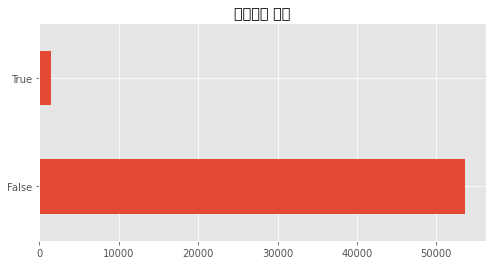

In [ ]:
plt.style.use('ggplot')

df3['adult'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('성인도서 비율')
plt.show()

- 카테고리 비율

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

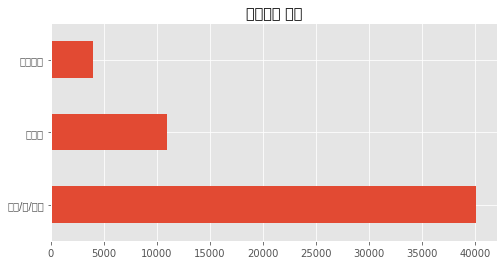

In [ ]:
df3['categoryName'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('카테고리 비율')
plt.show()

In [ ]:
df3['categoryName'].value_counts()

소설/시/희곡    40068
에세이        10951
자기계발        3957
Name: categoryName, dtype: int64

- rank 비율

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0, flags=flags)


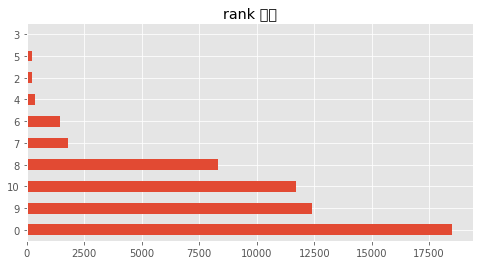

In [ ]:
df3['rank'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('rank 비율')
plt.show()

- 키워드 EDA

In [ ]:
# df2에서 각 관심사 키워드 나온 횟수
# df2 : total_keywords_30.pkl

for srch in key_list:
    for i in range(len(df2)):
        if df2[:]['keyword'][i] == srch:
            print(srch, df2.iloc[(i,1)])
            break
        else:
            pass

시대 5934
역사 4092
철학 993
로맨스 2201
전쟁 1824
미스터리 1389
예술 1516
판타지 1455
자서전 183
동화 767
과학 779
무협 164
고민 1837
열정 822
희곡 613
가족 2833
관계 2942
동물 688
사진 1364
그림 2167
여행 2169
미술 249
영화 2237
음악 751
음식 499
인생 6363
일상 5233
친구 3077
성공 1882
청춘 1049
정치 1091
취미 185
스포츠 90
일기 859
자연 2429
종교 652
사랑 14067
인간 8930
생각 8641
사회 5870
도전 589
긍정 572
후회 366
행복 3784
우울 389
위로 1802
고통 1764
자유 1682
희망 1567
슬픔 1294
열망 199
비극 1108
불안 1058
용기 1005
절망 902
불행 547
유머 555
힐링 214
리더십 187
시간 7149
페미니즘 160
취업 234
진로 79
비즈니스 207
설득 139
건강 506
심리 1135
